<a href="https://colab.research.google.com/github/chinmayAmbasht/phys-246-fa23/blob/main/QC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Physical Qubit

* Author: Chinmay Ambasht

* Date: 11.16.23

* Time spent on this assignment:

In [ ]:
!pip install scqubits
!pip install qiskit
!pip install qiskit[visualization];
!pip install qiskit_aer;
!pip install qutip
!pip install qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 77.9 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pylab as plt
import scipy.linalg
import scqubits
import matplotlib.animation as animation
from IPython.display import HTML
import scqubits

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.standard_gates import ZGate, XGate
from qiskit import IBMQ
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_distribution
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
import qutip
from qiskit.circuit.quantumregister import AncillaRegister
import pylab as plt
from qiskit.circuit.library import MCMT
import numpy as np
import scipy
from qiskit import *


def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','random']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return
import datetime;datetime.datetime.now()

sigma_x=np.matrix([[0,1],[1,0]],dtype=complex)
sigma_z=np.matrix([[1,0],[0,-1]],dtype=complex)




def RunCircuit(circuit,a=None):
  numQubits=circuit.num_qubits
  if a!=None:
    numQubits=max(numQubits,a.num_qubits)
    initCircuit=QuantumCircuit(a.num_qubits,a.num_qubits)
    initCircuit.initialize(a)
    circuit=AddCircuits([initCircuit,circuit])
  circuit.save_statevector(label='myStateVector')
  compiled_circuit = transpile(circuit, simulator)
  resultA = simulator.run(compiled_circuit).result()
  forward=list(range(0,numQubits))
  reverse=forward[::-1]
  circuit.measure(forward,reverse)
  compiled_circuit = transpile(circuit, simulator)
  resultB = simulator.run(compiled_circuit).result()
  return resultA.data()['myStateVector'],resultB.data()['counts']


def AddCircuits(theCircuits):
  numQubits=np.array([c.num_qubits for c in theCircuits])
  numQubits=np.max(numQubits)
  circuit=QuantumCircuit(numQubits,numQubits)
  for i in range(0,len(theCircuits)):
    circuit=circuit.compose(theCircuits[i],qubits=list(range(0,theCircuits[i].num_qubits)))
  return circuit



def AddBlochSphere(overlap,ax,withArrow=False):
    rho = np.outer(np.conj(overlap), overlap)
    bvec=(2 * np.real(rho[0,1]), 2 * np.imag(rho[0,1]), np.real(rho[0,0]) - np.real(rho[1,1]))
    if withArrow:
        sf = ax.quiver([0,], [0,],[0,],bvec[0], bvec[1], bvec[2])
    ax.scatter(bvec[0],bvec[1],bvec[2], color='r')
    return ax

def MakeBlochSphere():
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.set_zlim([0,1])
    ax.clear()
    ax.set_xlim([-1.1,1.1])
    ax.set_ylim([-1.1,1.1])
    ax.set_zlim([-1.1,1.1])
    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_surface(x, y, z, color="yellow", alpha = 0.3)
    ax.set_box_aspect((2,2,2))
    return ax

simulator = AerSimulator()


---

## Overview

So far we've learned about quantum computing as an abstract model of computation. We can represent a qubit as a vector of length 2 (and can represent $n$ qubits as a vector of length $2^n$).

In this section our goal is to understand how we actually build a quantum computer in the real world (and here we will only focus on 1 qubit).

Our goal will be to understand how you represent one qubit and apply a gate to it.

There are various different physical realizations of a qubit.  In this assignment, we will look at quantum electronic circuits.


## Exericise 0:  What Abstract Gate are you trying to implement?

### a. Abstract Model of Computation

Our target here is we want to go ahead and implement a gate using electronics.  The gate we are going to implement is the following gate:
```
circuit.rx(1./50.)
circuit.rz(1./50.)
```

Let's start by implementing this in qiskit.

Run the gate $k$ times (from $1< k < 400$) and graph (with two lines) the probability you would measure "0" and the probability you would measure "1" as a function of $k$.  

 /usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py: 1335

Text(0.5, 1.0, 'Hadamard evolution')

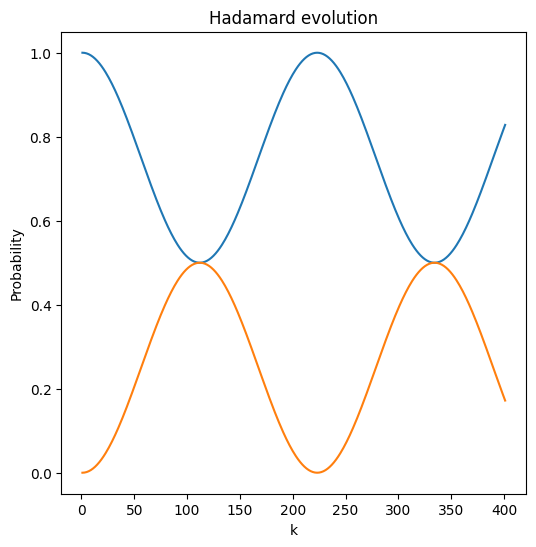

In [ ]:
## ANSWER HERE
def hadamard_time_evolution(circuit, k):
  for i in range(k):
    circuit.rx(1. / 50., 0)
    circuit.rz(1. / 50., 0)
p0 = []
p1 = []
states = []
j = np.arange(1, 402)
#HadamardTimeEvolution(400)
for k in range(401):
  circuit = QuantumCircuit(1, 1)
  hadamard_time_evolution(circuit, k)
  state, measure = RunCircuit(circuit)
  states.append(state)
  p0.append(state[0]*np.conjugate(state[0]))
  p1.append(1 - state[0]*np.conjugate(state[0]))

fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.plot(j, p0)
ax.plot(j, p1)
ax.set_xlabel("k")
ax.set_ylabel("Probability")
ax.set_title("Hadamard evolution")

We know that the state of a single qubit is $\alpha |0\rangle + \beta |1\rangle$ where $|\alpha|^2 + |\beta|^2=1$.   We might think that we could then represent the qubit by a point $(\alpha, \beta)$ which is on a circle of radius 1.  But $\alpha$ and $\beta$ are complex numbers so it's not quite that simple - instead you can represent the qubit as a point on a sphere.  This is called the Bloch sphere.  (Technical point: You might think that you need four numbers to represent two complex numbers but it's actually only three because of the normalization and relative phase).

At the moment, it's not important that you know how to perform this mapping but to understand for every qubit there is a point that it appears on the bloch sphere.

We will give you the following functions (*thanks Matt Thibodeau!*)
```
def AddBlochSphere(overlap,ax,withArrow=False):
    rho = np.outer(overlap.conj(), overlap)
    bvec=(2 * np.real(rho[0,1]), 2 * np.imag(rho[0,1]), np.real(rho[0,0]) - np.real(rho[1,1]))
    if withArrow:
        sf = ax.quiver([0,], [0,],[0,],bvec[0], bvec[1], bvec[2])
    ax.scatter(bvec[0],bvec[1],bvec[2], color='r')    
    return ax

def MakeBlochSphere():
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.set_zlim([0,1])
    ax.clear()
    ax.set_xlim([-1.1,1.1])
    ax.set_ylim([-1.1,1.1])
    ax.set_zlim([-1.1,1.1])
    u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_surface(x, y, z, color="yellow", alpha = 0.3)
    ax.set_box_aspect((2,2,2))
    return ax

```

To run it, you need to send a numpy array of overlaps that correspond to the overlap with $|0\rangle$ and the overlap with $|1\rangle$ -i.e
```
overlaps = [[1.0,0.0],[0.9,0.0513],[0.64,0.2]]
```
and then plot it as

```
ax=MakeBlochSphere()
ax=AddBlochSphere(states[0],ax,True)
for state in states[::10]:
    ax=AddBlochSphere(state,ax)
```


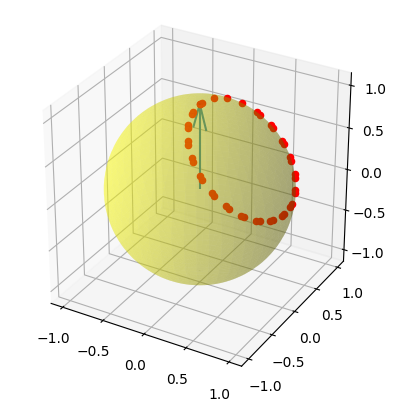

In [ ]:
### ANSWER HERE

#states_bloch = [[states[i][0]] for i in range(401)]
states_bloch = [[states[i][0], states[i][1]] for i in range(401)]
ax=MakeBlochSphere()
ax=AddBlochSphere(states[0],ax,True)
for state in states[::10]:
    ax=AddBlochSphere(state,ax)

---

## Exercise 1:  Particle in a box

* List of collaborators:

* References you used in developing your code:

We will need to begin by learning or recalling some aspects about quantum mechanics. There are three key things that you need to know about quantum mechanics:

* In quantum mechanics, the "rules" of the physical system are represented by a matrix called the Hamiltonian $H$  (in many ways,  the classical analogue of the energy) and the state of your system is represented by a vector $\Psi$.  

* If your quantum is in state $\Psi(0)$ at time 0, you can figure out what your Hamiltonian is at time $t$ by
$$\Psi(t) = \exp[i t H] \Psi(0).$$
In order to do that matrix exponential you can use
```
expH = scipy.linalg.expm(1.j * H * t)
```
If you are going to a large time $t$, it will often make sense to break it apart into a number of $T/\delta t$ smaller time steps each of size $\delta t$.  This will let you record information about your quantum state at each time step $\delta t$ - i.e. something like
```
for step in ts:
    psi = scipy.linalg.expm(1.j * H * delta_t) @ psi
```


* There are special quantum states $\Psi_i$ which don't change in time under time evolution.  These states are the eigenstates of $H$.  You can get the i'th eigenstate of $H$ by doing
```
np.linalg.eigh(H)[1][:,i]
```



## a. Hamiltonian for a Particle in a Box

We can start by working with a particle in a box.  Consider a particle in a box of length 20 spanning $-10 \leq x \leq 10$.

The Hamiltonian for a particle in a box is
$$ H=-\frac{\partial^2 }{\partial x^2} $$
with hard walls for any $|x|\geq 20$ outside the box.

We need to convert this into a matrix. To do that, we should know from calculus that the stencil for a second derivative is
$$ \frac{\partial^2 }{\partial x^2} \equiv \frac{f(x+\delta) - 2 f(x) + f(x-\delta)}{\delta^2} $$


We can let the rows and columns of the matrix $H$ be indexed by the values of $x$ - to get the values of $x$, we can do
```
L=20
delta_x = 0.01
ns=np.array(range(0,int((L+2*delta_x)//delta_x)))
xs=ns*delta_x-10
```
Then the above stencil corresponds to the matrix
$$
H[x_1,x_2] = \begin{cases}
1/(\delta x)^2 & \text{if } x_1==x_2 \\
-2/(\delta x)^2 & \text{if } \textrm{abs}(x_1-x_2)==\delta_x\\
0 & \text{otherwise }
\end{cases}
$$


* Make the Hamiltonian matrix H
* diagonalize it and
* plot the first four eigenstates $v_a, v_b, v_c, v_d$ You should recognize the solutions to the particle in a box.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

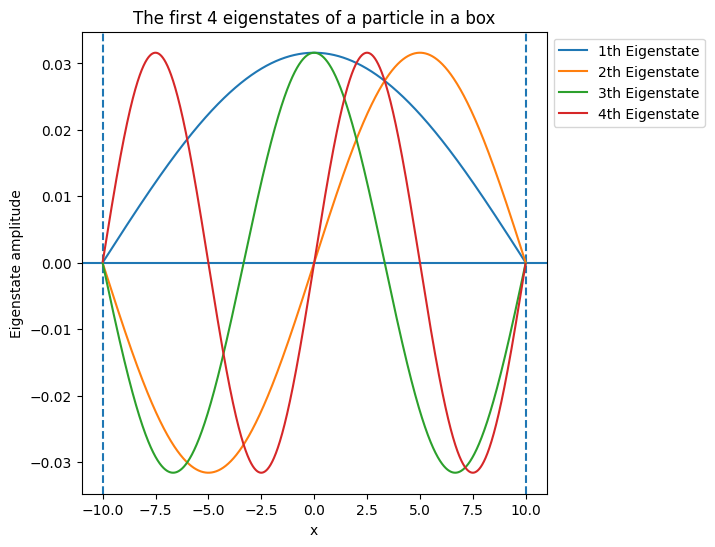

In [ ]:

def construct_hamiltonian(N, delta_x):
    H_matrix = np.zeros([N, N])
    #print(H_matrix)
    diagonal =   2  / (delta_x ** 2)
    off_diagonal = - 1 / (delta_x ** 2)
    for i in range(N):
      for j in range(N):
        if i == j:
          #print(H_matrix)
          H_matrix[i][j] = diagonal
          #print(H_matrix)
        if abs(i - j) == 1:
          #print(H_matrix)
          H_matrix[i, j] = off_diagonal
    return H_matrix

# Example usage:
L=20
delta_x = 0.01
ns=np.array(range(0,int((L+2*delta_x)//delta_x)))
xs=ns*delta_x-10


H_matrix = construct_hamiltonian(len(xs), delta_x)
#print(H_matrix)
eigen_states = []
for i in range(0, 4):
  eigen_states.append(np.linalg.eigh(H_matrix)[1][:,i])

# Plotting code
fig, ax = plt.subplots(1,1,figsize = (6,6))
ax.axhline(0)
ax.axvline(-10, linestyle = "--")
ax.axvline(10, linestyle = "--")
for i in range(4):
  plt.plot(xs, eigen_states[i], label = f"{i + 1}th Eigenstate")
ax.set_xlabel('x')
ax.set_ylabel('Eigenstate amplitude')
ax.set_title('The first 4 eigenstates of a particle in a box')
ax.legend(bbox_to_anchor = (1,1))

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

The eigenvalues for a particle in a box are quantized.  They should be equal to
$$E_n = \frac{\pi^2}{L^2}n^2$$
for $n=\{1,2,...\}$.

Plot the lowest five eigen-energies and compare them against this formula.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

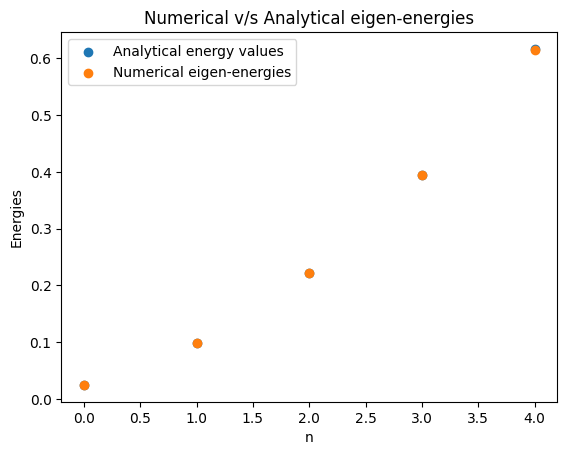

In [ ]:
### ANSWER HERE
#L = 10
E_n = [(i**2 * np.pi**2) / L**2 for i in range(1, 6)]
#print(E_n)
eigen_energies = np.linalg.eigh(H_matrix)[0][0:5]
#print(eigen_energies)
i = np.arange(0, 5)
plt.scatter(i, E_n, label = 'Analytical energy values')
plt.scatter(i , eigen_energies, label = 'Numerical eigen-energies')
plt.title('Numerical v/s Analytical eigen-energies')
plt.xlabel('n')
plt.ylabel('Energies')
plt.legend()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

## b. Time Evolution

Our next step will be to implement time evolution.  Let us start by trying to time-evolve $v_a$ under the Hamiltonian $H$.  Recall that eigenstates should be stationary (and so don't evolve in time).  Therefore, under time evolution we should find that this state always looks the same.  Let's check this.  

Using
* a total time of $T=5$
* a time step of $\delta t=0.1$

Plot the value of $|v(t)|$ at time steps $t=\{0,1,3,5\}$.
The absolute value is necessary because under time-evolution the wave-function can become complex (one could also plot the phase of the wave-function if desired but don't worry about this).



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE
def time_evolution(T, delta_t, psi):
  record_psi = []
  ts = np.arange(0,T,delta_t)
  expH = scipy.linalg.expm(1.j * H_matrix * delta_t)
  for step in ts:
    psi = expH @ psi
    if step == 0 or step == 1 or step == 3 or step == 5:
      record_psi.append(np.abs(psi))
  return record_psi
record_first_eigen = time_evolution(5.1, 0.1, eigen_states[0])


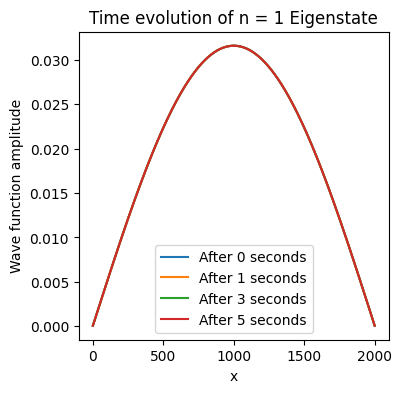

In [ ]:
#print(np.array(record_first_eigen).shape)
steps = [0, 1, 3, 5]
fig, ax = plt.subplots(1,1, figsize = (4,4))
for i in range(0, 4):
  ax.plot(record_first_eigen[i], label = f'After {steps[i]} seconds')
ax.set_xlabel('x')
ax.set_ylabel('Wave function amplitude')
ax.set_title('Time evolution of n = 1 Eigenstate')
ax.legend()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

You should have noticed that our previous time evolution was pretty uninteresting as nothing changed under the time evolution.  Our next step will be to implement time evolution on a more complicated state.  

We will consider two states:

$$v_0=\frac{1}{\sqrt{2}}(v_a+v_b)$$

$$v_1=\frac{1}{\sqrt{2}}(v_a-v_b)$$

These two states are orthogonal on each other - i.e. `np.vdot(v0,v1)=0`.  You can check this.

We want to do time evolution with our Hamiltonian on the state $v_0$.  
Perform time evolution
* starting at $v_0$
* $\delta t=0.1$
* for time $T=50\%$
* and graph the result at $T=\{4.0,18.3,41.0\}$
* Also graph (with dotted lines - `linestyle="--"`) $v_0$ and $v_1$





<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE
va = eigen_states[0]
vb = eigen_states[1]
v0 = 1 / np.sqrt(2) * (va + vb)
v1 = 1 / np.sqrt(2) * (va - vb)

print("The dot product of the two superpositions:", np.round(np.vdot(v0, v1), 4))
def time_evolution_superpositions(T, delta_t, psi):
  record_psi = []
  ts = np.arange(0,T,delta_t)
  expH = scipy.linalg.expm(1.j * H_matrix * delta_t)
  for step in ts:
    psi = expH @ psi
    if step == 4.0 or step == 18.3 or step == 41.0:
      record_psi.append(np.abs(psi))
  return record_psi
record_sum = time_evolution_superpositions(50.0, 0.1, v0)
record_diff = time_evolution_superpositions(50.0, 0.1, v1)

The dot product of the two superpositions: 0.0


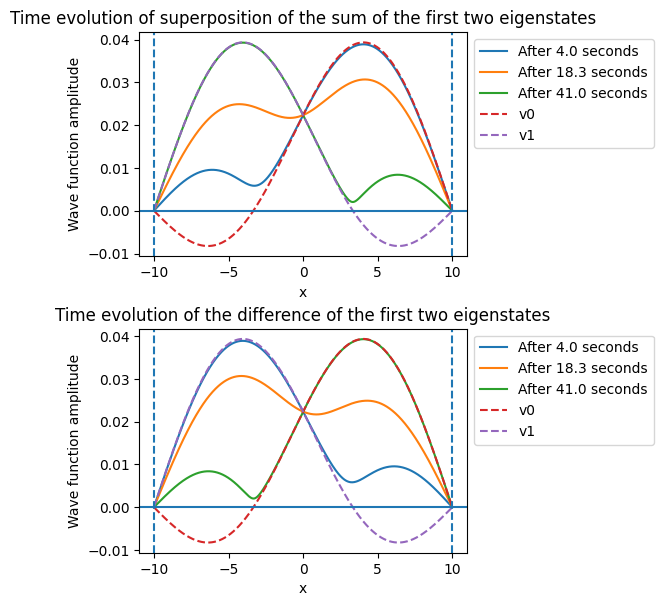

In [ ]:
steps = [4.0, 18.3, 41.0]
fig, ax = plt.subplots(2,1, figsize = (6,6))
for i in range(0, 3):
  ax[0].plot(xs, record_sum[i], label = f'After {steps[i]} seconds')
ax[0].plot(xs, v0, linestyle = '--', label = 'v0')
ax[0].plot(xs, v1, linestyle = '--', label = 'v1')
ax[0].axhline(0)
ax[0].axvline(-10, linestyle = '--')
ax[0].axvline(10, linestyle = '--')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Wave function amplitude')
ax[0].set_title('Time evolution of superposition of the sum of the first two eigenstates')
ax[0].legend(bbox_to_anchor = (1,1))

#fig, ax = plt.subplots(1,1, figsize = (6,6))
for i in range(0, 3):
  ax[1].plot(xs, record_diff[i], label = f'After {steps[i]} seconds')
ax[1].plot(xs, v0, linestyle = '--', label = 'v0')
ax[1].plot(xs, v1, linestyle = '--', label = 'v1')
ax[1].axhline(0)
ax[1].axvline(-10, linestyle = '--')
ax[1].axvline(10, linestyle = '--')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Wave function amplitude')
ax[1].set_title('Time evolution of the difference of the first two eigenstates')
ax[1].legend(bbox_to_anchor = (1,1))

fig.tight_layout(pad = 0.5)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

## c. State overlaps


We've seen that our time evolution slowly moves us from state $v_0$ to state $v_1$ over a time over a time of $T=41$.   In between, $T=0$ and $T=41$, the state is a little bit of $v_0$ and a little bit of $v_1$.  We would like to quantify this better by computing the overlap with these two states as a function of time.

We have a state $v(t)$.  To compute the overlap with $v_0$ we can just do
`np.vdot(v , v_0)`.  

This overlap is a complex number.   We can only plot real numbers so if we want to plot it, we need to plot something like
* the absolute value `np.abs(...)` (or its square) and
* phase `np.angle(...)` or

Plot as a function of time from $T=0$ to $T=100$ the overlap of $|v(t)|^2$ with both $v_0$ and $v_1$.  

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE
def overlap(v, reference_state):
  return np.vdot(v, reference_state)

def time_evolution_overlap(T, delta_t, psi, reference_state):
  record_psi = []
  ts = np.arange(0,T,delta_t)
  expH = scipy.linalg.expm(1.j * H_matrix * delta_t)
  for step in ts:
    psi = expH @ psi
    record_psi.append(overlap(psi, reference_state))
  return record_psi

overlapv0 = time_evolution_overlap(100, 0.1, v0, v0)
overlapv1 = time_evolution_overlap(100, 0.1, v0, v1)

In [ ]:

def plot_mod_phase(f):
  ts = np.arange(0,100,0.1)
  fig,ax = plt.subplots(2,1,figsize = (6,6))
  ax[0].plot(ts, np.abs(f)**2)
  ax[0].set_title(f'Absolute value of the overlap ')
  ax[1].plot(ts, np.angle(f))
  ax[1].set_title(f'Angle of the overlap')
  fig.tight_layout(pad = 0.5)
  #return ax

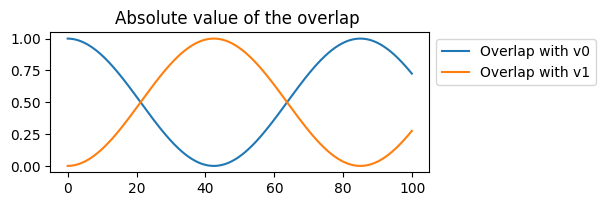

In [ ]:
ts = np.arange(0, 100, 0.1)
fig,ax = plt.subplots(1,1,figsize = (6,2))
ax.plot(ts, np.abs(overlapv0)**2, label = 'Overlap with v0')
ax.plot(ts, np.abs(overlapv1)**2, label = 'Overlap with v1')
ax.legend(bbox_to_anchor = (1,1))
ax.set_title(f'Absolute value of the overlap ')

fig.tight_layout(pad = 0.5)


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Now we can get our first inkling of how you might build a qubit and a (always-on and hence not-very-useful) gate.  

Suppose someone comes to you with a particle in a box. There are many eigenstates for that particle in the box: $v_0, v_1, v_2, v_3, ...$

You pick two of those eigenstates (let's say $v_0$ and $v_1$) and claim that those are the states that correspond to $|0\rangle$ and $|1\rangle$.  

This particle-in-a-box is now a qubit.  The other eigenstates we ignore (and are hoping that you never accidentally get stuck in - this would cause an error).

Now a gate is something that takes you from one quantum state to another.  For example, a not gate should take

$$|0\rangle \rightarrow |1\rangle$$
$$|1\rangle \rightarrow |0\rangle$$

Looking at our previous results, we can see that if we just have a particle-in-a-box that it implements a not-gate every $T=41.0$ seconds.  

This is a little bit unsatsifying because it's not like we can turn our Hamiltonian on and off.  We really need a Hamiltonian $H(\theta)$ where we have some knob $\theta$ that we can change so we can turn gates on and off.  

In the next exercise, we will see how to go about this.

## Exercise 2: Fluxonium

In the previous exercise, we worked on a particle-in-a-box.  Unfortuantely, you don't run into such physical systems particular often.  In this exercise, we will work with something more realistic:  a fluxonium built out of various electronic components.

Here is the electronic circuit for a fluxonium qubit:

<div><img src="https://scqubits.readthedocs.io/en/latest/_images/fluxonium.png" width=400 align=left alt="Answer (start)"></img><br></div>


The fluxoinum qubit consists of three electronic components: a capacitor, an inductor, and a Josephson junction.  You're probably familiar with capacitors and inductors. You regularly run into them in classical circuits.  A Josephson junction is an electronic component which sandwhiches an insulator between two superconducting materials.  Across the Josephson junction there is a change in the phase $\phi$.  

Typically in a circuit you need to keep track of the voltage and current.  When you have a Josephson Junction you need to keep track also of the phase.

In electronics you might have treated the circuit classically righting out the classical energy of the circuit - i.e. $E=\frac{1}{2}CV^2+ \frac{1}{2}LI^2$  In quantum mechanics, instead of writing out an energy for our circuit, we write out a Hamiltonian $H$.  

## a. Fluxonium Hamiltonian

The relevant Hamiltonian for this circuit is

$$H=-4E_\text{C}\frac{\partial^2 }{\partial \phi^2}+\frac{1}{2}E_L \phi^2 -E_\text{J}\cos(\phi-\varphi_\text{ext}) $$

where $E_C$ is the charging energy, $E_J$ the Josephson energy and $E_L$ the inductive energy.


In the particle-in-a-box we were working with $x$. Here you should just mentally replace  $\phi$ with $x$.  Just like earlier we will let $-20\leq \phi \leq 20$.

Now we can look at this Hamiltonian.  The first term, $-4E_\text{C}\frac{\partial^2 }{\partial \phi^2}$ you've already seen; this is the particle-in-a-box term (notice the extra factor of $4E_C$). You already know how to build the matrix for this term.  This term is caused by the capacitor.  Essentially the capacitor would like the wave-function (when drawn in the $\phi$ basis) to be more spread out.

We will then need to add a matrix for the the inductor term and the Josephson junction term.  Both of these terms will be diagonal matrices.  

The term $\frac{1}{2}E_L \phi^2$ is the Hamiltonian for the inductor and has the matrix $H[\phi,\phi] = \frac{1}{2}E_L \phi^2$ (and zero otherwise)

The term $E_\text{J}\cos(\phi-\varphi_\text{ext})$ is the Hamiltonian for the inductor and has the matrix  $H[\phi,\phi] = E_\text{J}\cos(\phi-\varphi_\text{ext})$ (and zero otherwise).

$\varphi_\text{ext}$ is a number that you (as an experimentalist) get to control as a knob.  It corresponds to the amount of magnetic flux (caused by sticking a manget in the right place) you drive through a hole in the circuit.

By changing this we will be able to turn circuit elements on and off.  

Build this Hamiltonian for $H$.  Use the following parameters:
* Ec=0.5
* El=0.8
* Ej=4
* $\varphi_\text{ext}=\pi$




As in the previous case, we want to diagonalize our Hamiltonian and find some number of eigenstates.  Plot the first three eigenstates as well as eigenvalues.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
L=40
delta_phi = 0.01
ns=np.array(range(0,int((L+2*delta_phi)//delta_phi)))
phis=ns*delta_phi-20
#print(len(phis))
def construct_fluxonium_hamiltonian(N_phi, delta_phi, Ec, El, Ej, phi_ext):
  H = np.zeros([N_phi, N_phi])
  for i in range(N_phi):
    for j in range(N_phi):
      if i == j:
       H[i,j] =  - Ej * np.cos(delta_phi * i - 20 - phi_ext) + 0.5 * El * (delta_phi * i - 20) ** 2 + 4 * Ec * (2 / delta_phi ** 2)
      elif abs(i - j) == 1:
        H[i,j] = 4 * Ec * ( - 1 / delta_phi **2)
  return H

H_matrix_fluxonium = construct_fluxonium_hamiltonian(len(phis), delta_phi, 0.5, 0.8, 4, np.pi )
H_matrix_fluxonium

array([[ 40161.63232825, -20000.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [-20000.        ,  40161.50880383, -20000.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        , -20000.        ,  40161.38519254, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
         40161.50880383, -20000.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
        -20000.        ,  40161.63232825, -20000.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        , -20000.        ,  40161.75576943]])

In [ ]:
### ANSWER HERE
diagonalized_H_flux = np.linalg.eigh(H_matrix_fluxonium)

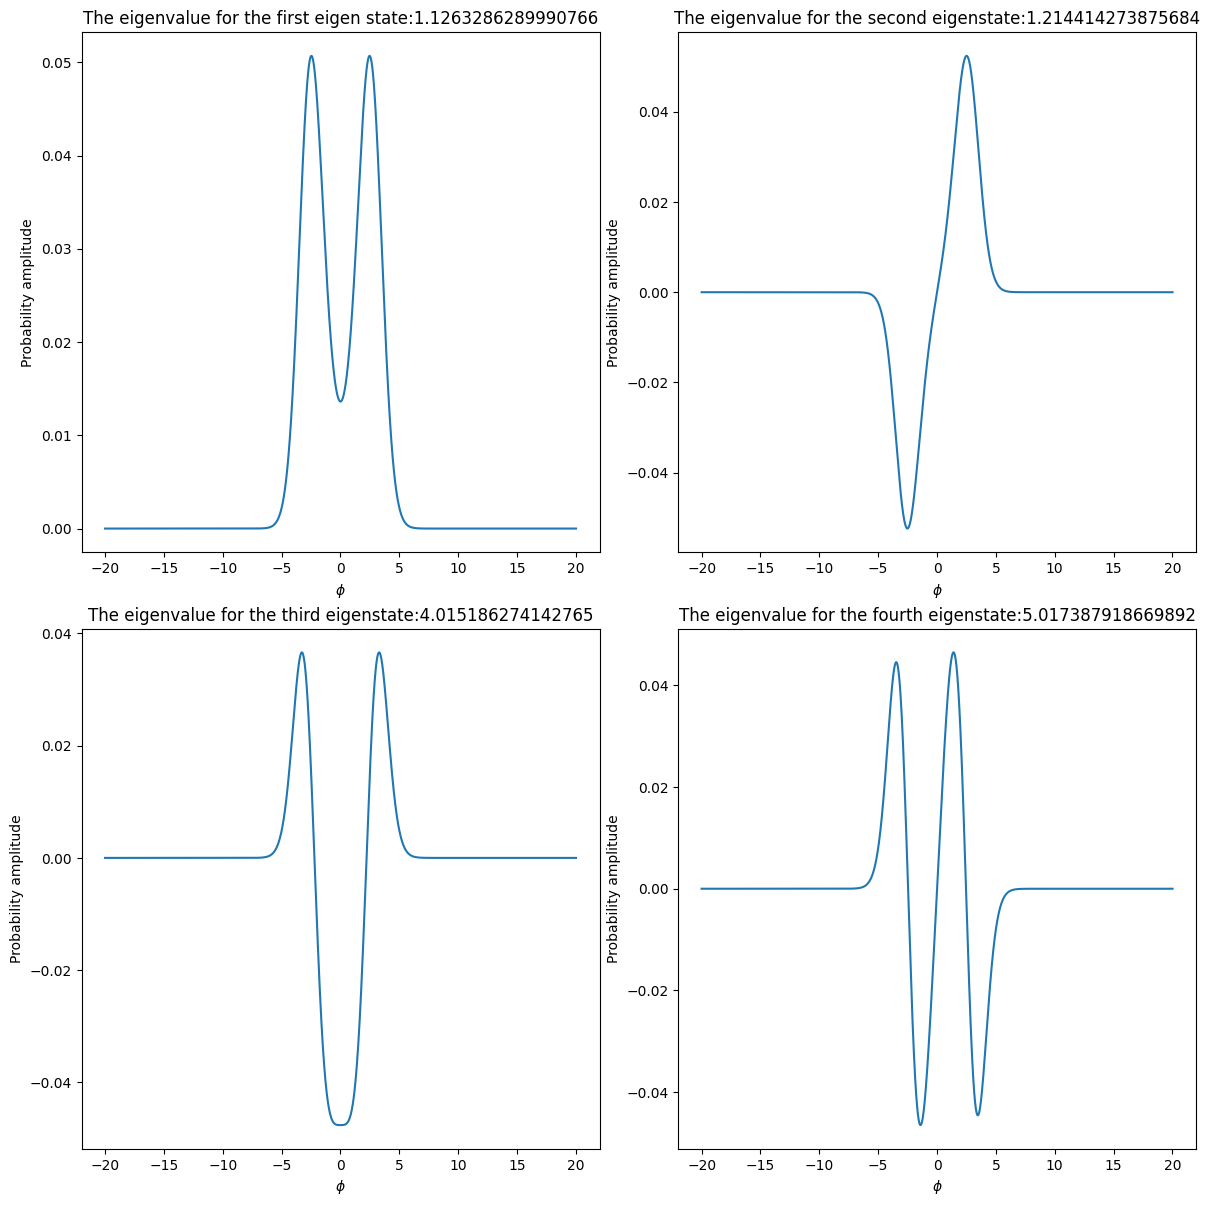

In [ ]:
eigen_states_flux = []
for i in range(0, 4):
  eigen_states_flux.append(diagonalized_H_flux[1][:,i])
eigen_values = diagonalized_H_flux[0][0:4]
# Plotting code
fig, ax = plt.subplots(2,2,figsize = (12,12))
#phis = np.arange(-20, 22, 0.01)

ax[0][0].plot(phis, eigen_states_flux[0])
ax[0][0].set_xlabel(r'$\phi$')
ax[0][0].set_ylabel('Probability amplitude')
ax[0][0].set_title(f'The eigenvalue for the first eigen state:{eigen_values[0]}')

ax[0][1].plot(phis, eigen_states_flux[1])
ax[0][1].set_xlabel(r'$\phi$')
ax[0][1].set_ylabel('Probability amplitude')
ax[0][1].set_title(f'The eigenvalue for the second eigenstate:{eigen_values[1]}')

ax[1][0].plot(phis, eigen_states_flux[2])
ax[1][0].set_xlabel(r'$\phi$')
ax[1][0].set_ylabel('Probability amplitude')
ax[1][0].set_title(f'The eigenvalue for the third eigenstate:{eigen_values[2]}')

ax[1][1].plot(phis, eigen_states_flux[3])
ax[1][1].set_xlabel(r'$\phi$')
ax[1][1].set_ylabel('Probability amplitude')
ax[1][1].set_title(f'The eigenvalue for the fourth eigenstate:{eigen_values[3]}')
fig.tight_layout(pad = 0.5)
#print(phis)

In [ ]:
print("The first three eigenvalues are:",diagonalized_H_flux[0][0:4])

The first three eigenvalues are: [1.12632863 1.21441427 4.01518627 5.01738792]


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## b. Time Evolution

We are going to use the first two eigenstates $v_0$ and $v_1$ as the $|0\rangle$ and $|1\rangle$ states for our qubit. Then we are going to see how manipulating $\varphi_\textrm{ext}$ allows us to turn on and off different gates.

We have already decided what our eigenstates are $|0\rangle$ and $|1\rangle$ are going to be. Let's imagine that we have set up our eigenstate into state $|0\rangle$.  Now, we imagine that we change our magnetic field to $\pi + 0.00360 \times 2\pi$.  Then the eigenstate (from the previous external field) is going to change based on our new field.  Do time evolution with this Hamiltonian for a
* time $T=100$ with
* $\delta t=0.1$ and
* plot the overlap squared with the states $|0\rangle$ and $|1\rangle$.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE
L=40
delta_phi = 0.01
ns=np.array(range(0,int((L + 2*delta_phi)//delta_phi)))
phis=ns * delta_phi - 20
#hamiltonian_new = construct_fluxonium_hamiltonian(len(phis), delta_phi, 0.5, 0.8, 4, np.pi + 0.00360 * 2 * np.pi)

hamiltonian_new = construct_fluxonium_hamiltonian(len(phis), delta_phi, 0.5, 0.8, 4, np.pi + 0.00360 * 2 * np.pi)
eigen_states_flux_n = np.linalg.eigh(hamiltonian_new)[1][:2]
v0_flux = eigen_states_flux_n[0]
v1_flux = eigen_states_flux_n[1]

print("The dot product of the two superpositions:", np.round(np.vdot(v0_flux, v1_flux), 4))
def overlap(v, reference_state):
  return np.vdot(v, reference_state)
delta_t = 0.1
expH = scipy.linalg.expm(1.j * hamiltonian_new * delta_t)

The dot product of the two superpositions: 0.0


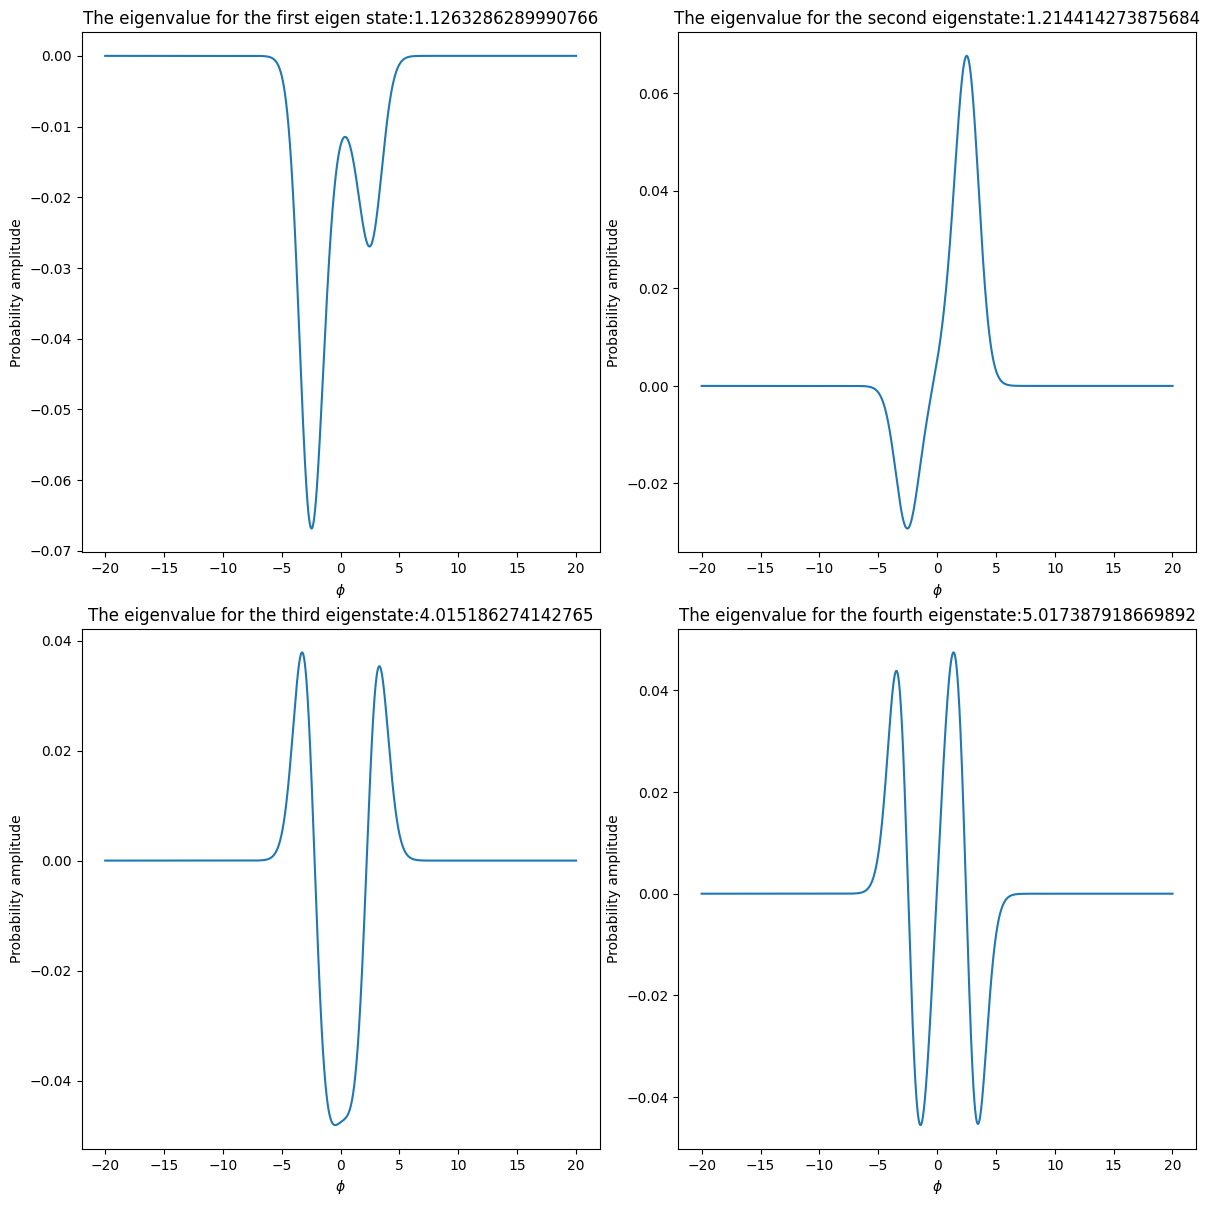

In [ ]:
diagonalized_H_flux_new = np.linalg.eigh(hamiltonian_new)
eigen_states_flux_n = []
for i in range(0, 4):
  eigen_states_flux_n.append(diagonalized_H_flux_new[1][:,i])
eigen_values = diagonalized_H_flux[0][0:4]
# Plotting code
fig, ax = plt.subplots(2,2,figsize = (12,12))
#phis = np.arange(-20, 22, 0.01)

ax[0][0].plot(phis, eigen_states_flux_n[0])
ax[0][0].set_xlabel(r'$\phi$')
ax[0][0].set_ylabel('Probability amplitude')
ax[0][0].set_title(f'The eigenvalue for the first eigen state:{eigen_values[0]}')

ax[0][1].plot(phis, eigen_states_flux_n[1])
ax[0][1].set_xlabel(r'$\phi$')
ax[0][1].set_ylabel('Probability amplitude')
ax[0][1].set_title(f'The eigenvalue for the second eigenstate:{eigen_values[1]}')

ax[1][0].plot(phis, eigen_states_flux_n[2])
ax[1][0].set_xlabel(r'$\phi$')
ax[1][0].set_ylabel('Probability amplitude')
ax[1][0].set_title(f'The eigenvalue for the third eigenstate:{eigen_values[2]}')

ax[1][1].plot(phis, eigen_states_flux_n[3])
ax[1][1].set_xlabel(r'$\phi$')
ax[1][1].set_ylabel('Probability amplitude')
ax[1][1].set_title(f'The eigenvalue for the fourth eigenstate:{eigen_values[3]}')
fig.tight_layout(pad = 0.5)
#print(phis)

In [ ]:
### ANSWER HERE
diagonalized_H_flux_new = np.linalg.eigh(hamiltonian_new)
eigen_states_flux_n = []
for i in range(0, 4):
  eigen_states_flux_n.append(diagonalized_H_flux_new[1][:,i])
eigen_values = diagonalized_H_flux[0][0:4]

diagonalized_H_flux_og = np.linalg.eigh(H_matrix_fluxonium)
eigen_states_flux_og = []
for i in range(0, 4):
  eigen_states_flux_og.append(diagonalized_H_flux_og[1][:,i])
eigen_values = diagonalized_H_flux[0][0:4]

In [ ]:
def time_evolution_overlap_flux(T, delta_t, psi):
  record_psi = []
  ts = np.arange(0,T,delta_t)
  for step in ts:
    psi = expH @ psi
    record_psi.append(psi)
  return record_psi
v0_t = time_evolution_overlap_flux(100, 0.1, eigen_states_flux[0])


In [ ]:
overlapv0_flux = []
overlapv1_flux = []
for i in range(1000):
  overlapv0_flux.append(np.vdot(v0_t[i], eigen_states_flux_og[0]))
  overlapv1_flux.append(np.vdot(v0_t[i], eigen_states_flux_og[1]))
np.shape(overlapv1_flux)

(1000,)

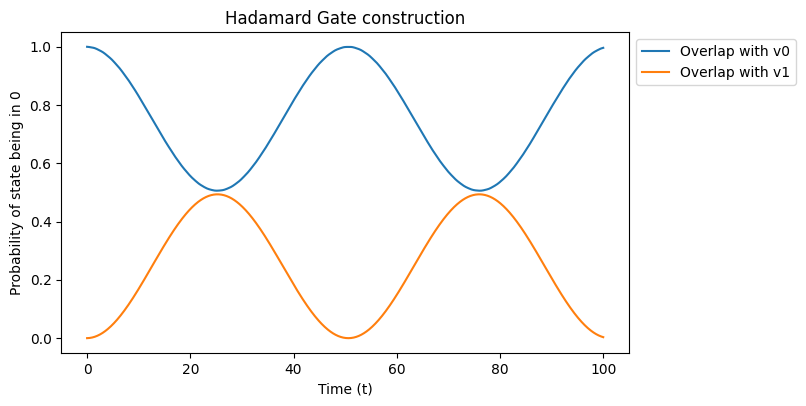

In [ ]:
ts = np.linspace(0, 100, 1000)
fig,ax = plt.subplots(1,1,figsize = (8,4))
ax.plot(ts, np.abs(overlapv0_flux)**2, label = 'Overlap with v0')
ax.plot(ts, np.abs(overlapv1_flux)**2, label = 'Overlap with v1')
ax.legend(bbox_to_anchor = (1,1))
ax.set_title("Hadamard Gate construction")
ax.set_xlabel("Time (t)")
ax.set_ylabel('Probability of state being in 0')
fig.tight_layout(pad = 0.5)


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

You will notice that by changing the magnetic field by a tiny amount and waiting for about 24 seconds, we've implemented a gate which takes $|0\rangle$ to half $|0\rangle$ and half $|1\rangle$.  Because this is probabilities that you are measuring, actually this gate is taking $|0\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ (actually the plot you made isn't sufficient information to distinguish between $+|1\rangle$ and $-|1\rangle$.  


Actually, if you want more seconds (or less seconds) you actually get a whole manifold of states.  In the next two sections, we will better understand the manifold of gates we've made.


## c.  The Bloch Sphere



Using your results from (b), plot on the Bloch sphere your gate.
Identify where on the Bloch sphere the initial point is and the point at $T=44$ seconds.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

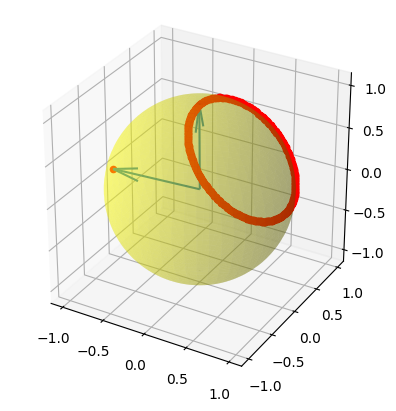

In [ ]:
### ANSWER HERE

states_bloch = [[overlapv0_flux[i], overlapv1_flux[i]] for i in range(401)]
ax=MakeBlochSphere()
ax=AddBlochSphere(states_bloch[0], ax, True)
ax = AddBlochSphere(states_bloch[239], ax, True)
for state in states:
    ax=AddBlochSphere(state,ax)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 3: Fluxonium with scqubits (Extra credit: 10 points)

### a.

In this exercise, we are going to replicate the above results using a python package called scqubits.  scqubits already knows about the fluxonium Hamiltonian and so we can just tell it that we want to have a fluxonium molecule by doing

```
fluxonium = scqubits.Fluxonium(EJ = 4,
                               EC = 0.5,
                               EL = 0.8,
                               flux = 0.5,
                               cutoff = 110)
```
The flux is in units of $2\pi$ so previously we had a flux of $\pi$.  Now we have a flux of 0.5

To get the Hamiltonian of the fluxonium molecule, you should use ```fluxonium.hamiltonian()```

You may notice that if you print the Hamiltonian it looks different then the Hamiltonian that you generated in previous sections.  This is because the Hamiltonian is in a different basis.  You can essentially ignore this and do the same steps that you did before.  Use it to generate the absolute value and bloch sphere plots.

There is an ambiguity here in the sign of the eigenstates.  Use this to change the eigenstate:
```
if vvv[1,1]>0:
    vvv[:,1]=vvv[:,1]*-1
```


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE
fluxonium = scqubits.Fluxonium(EJ = 4,
                               EC = 0.5,
                               EL = 0.8,
                               flux = 0.5,
                               cutoff = 110)
hamiltonian_scq = fluxonium.hamiltonian()
delta_t = 0.1
expH_scq = np.exp(1.j * hamiltonian_scq * delta_t)

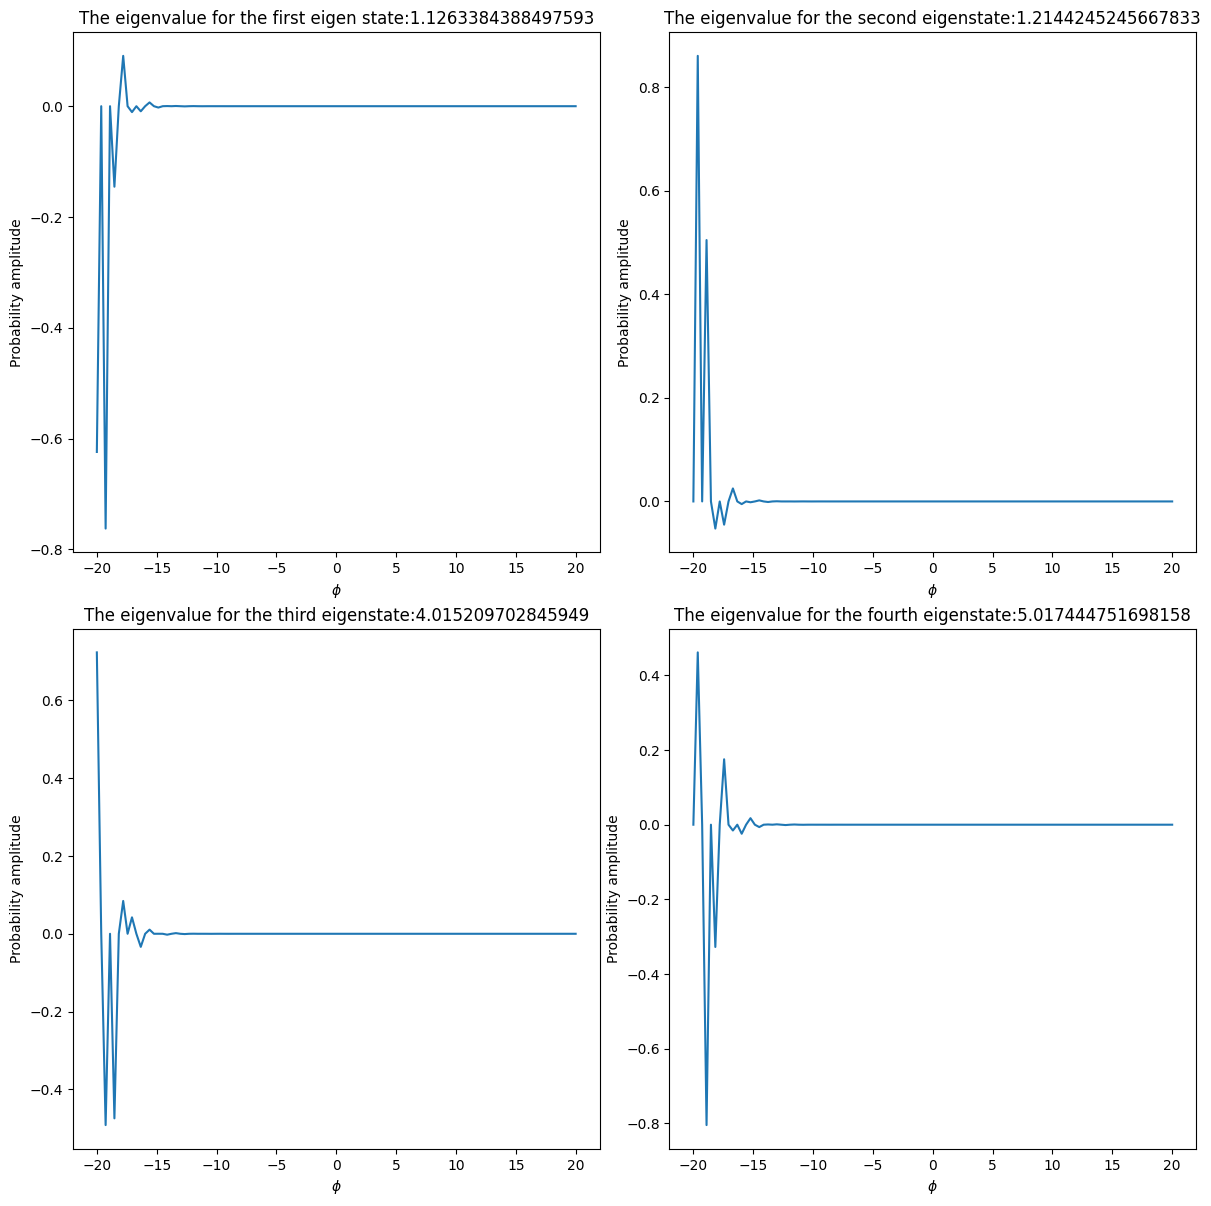

In [ ]:
diagonalized_H_flux_new_scq = np.linalg.eigh(hamiltonian_scq)
eigen_states_flux_scq = []
for i in range(0, 4):
  eigen_states_flux_scq.append(diagonalized_H_flux_new_scq[1][:,i])
eigen_values = diagonalized_H_flux_new_scq[0][0:4]
# Plotting code
fig, ax = plt.subplots(2,2,figsize = (12,12))
#phis = np.arange(-20, 22, 0.01)
phis = np.linspace(-20,20,110)
ax[0][0].plot(phis, eigen_states_flux_scq[0])
ax[0][0].set_xlabel(r'$\phi$')
ax[0][0].set_ylabel('Probability amplitude')
ax[0][0].set_title(f'The eigenvalue for the first eigen state:{eigen_values[0]}')

ax[0][1].plot(phis, eigen_states_flux_scq[1])
ax[0][1].set_xlabel(r'$\phi$')
ax[0][1].set_ylabel('Probability amplitude')
ax[0][1].set_title(f'The eigenvalue for the second eigenstate:{eigen_values[1]}')

ax[1][0].plot(phis, eigen_states_flux_scq[2])
ax[1][0].set_xlabel(r'$\phi$')
ax[1][0].set_ylabel('Probability amplitude')
ax[1][0].set_title(f'The eigenvalue for the third eigenstate:{eigen_values[2]}')

ax[1][1].plot(phis, eigen_states_flux_scq[3])
ax[1][1].set_xlabel(r'$\phi$')
ax[1][1].set_ylabel('Probability amplitude')
ax[1][1].set_title(f'The eigenvalue for the fourth eigenstate:{eigen_values[3]}')
fig.tight_layout(pad = 0.5)
#print(phis)

In [ ]:
fluxonium1 = scqubits.Fluxonium(EJ = 4,
                               EC = 0.5,
                               EL = 0.8,
                               flux = 0.5036,
                               cutoff = 110)
hamiltonian_scq_n = fluxonium1.hamiltonian()
H_new = np.exp(1.0j * hamiltonian_scq_n * 0.1)
def time_evolution_overlap_flux_scq(T, delta_t, psi):
  record_psi = []
  ts = np.arange(0,T,delta_t)
  for step in ts:
    psi = H_new @ psi
    record_psi.append(psi)
  return record_psi
v0_t = time_evolution_overlap_flux_scq(100, 0.1, eigen_states_flux_scq[0])


 <ipython-input-116-d9682b879efb>: 12RuntimeWarning: invalid value encountered in matmul
 <ipython-input-116-d9682b879efb>: 12

In [ ]:
overlapv0_flux = []
overlapv1_flux = []
for i in range(1000):
  overlapv0_flux.append(np.vdot(v0_t[i], eigen_states_flux_scq[0]))
  overlapv1_flux.append(np.vdot(v0_t[i], eigen_states_flux_scq[1]))
np.shape(overlapv1_flux)

(1000,)

 <ipython-input-118-246ca6c01e6f>: 3RuntimeWarning: overflow encountered in square
 <ipython-input-118-246ca6c01e6f>: 4

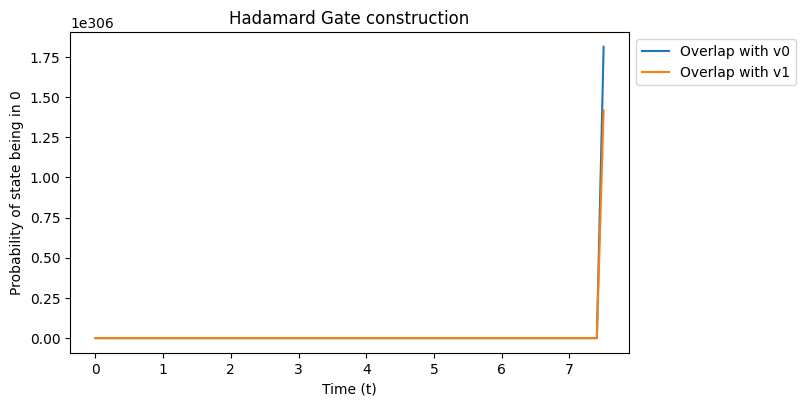

In [ ]:
ts = np.linspace(0, 100, 1000)
fig,ax = plt.subplots(1,1,figsize = (8,4))
ax.plot(ts, np.abs(overlapv0_flux)**2, label = 'Overlap with v0')
ax.plot(ts, np.abs(overlapv1_flux)**2, label = 'Overlap with v1')
ax.legend(bbox_to_anchor = (1,1))
ax.set_title("Hadamard Gate construction")
ax.set_xlabel("Time (t)")
ax.set_ylabel('Probability of state being in 0')
fig.tight_layout(pad = 0.5)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html --no-input "/content/drive/MyDrive/Colab Notebooks/QC2.ipynb"

Mounted at /content/drive
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/QC2.ipynb to html
[NbConvertApp] Writing 1787618 bytes to /content/drive/MyDrive/Colab Notebooks/QC2.html
